C:\Users\skybl\AppData\Local\Temp\ipykernel_24684\4112770083.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_daily_tempo = merged_df.groupby(['week', 'day_of_week']).apply(weighted_avg_tempo).reset_index(name='avg_tempo')


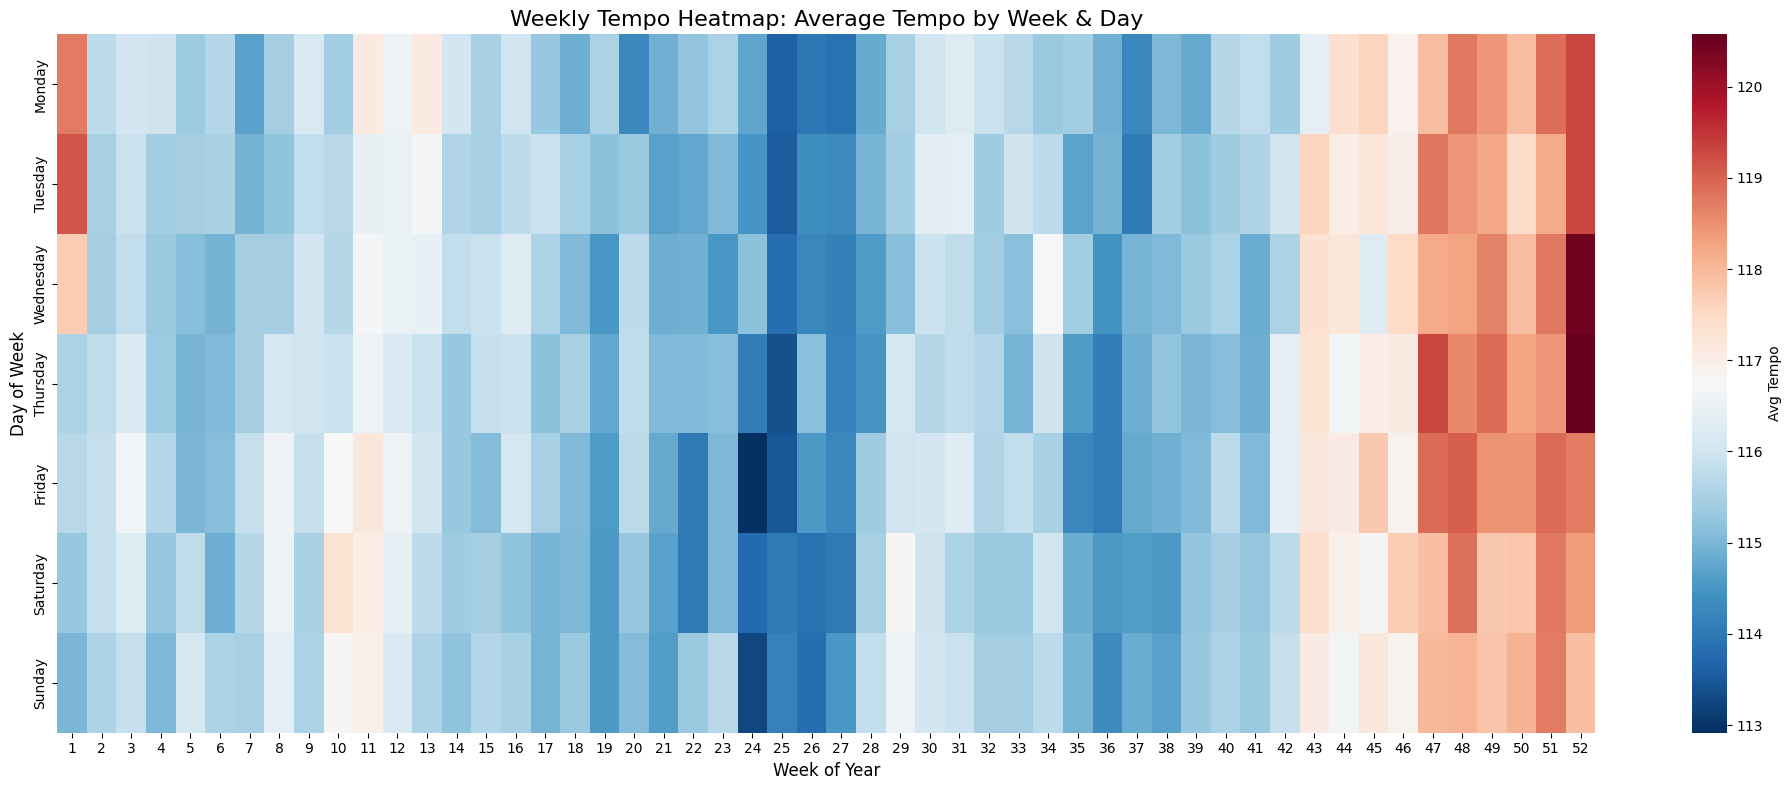

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
charts_df = pd.read_csv('../data/processed_data/spotify_2025_daily_charts.csv')
weather_df = pd.read_csv('../data/processed_data/weather_charts_processed.csv')
music_df = pd.read_csv('../data/processed_data/merged_music.csv')

# 2. 전처리 및 병합
charts_df['date'] = pd.to_datetime(charts_df['date'])
merged_df = pd.merge(charts_df, music_df, on=['track_name', 'artist_names'], how='inner')

# 요일 및 주차 생성
merged_df['week'] = merged_df['date'].dt.isocalendar().week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 3. 가중 평균 템포 계산
def weighted_avg_tempo(group):
    return np.average(group['tempo'], weights=group['streams'])

weekly_daily_tempo = merged_df.groupby(['week', 'day_of_week']).apply(weighted_avg_tempo).reset_index(name='avg_tempo')

# 4. 피벗 테이블 생성
heatmap_data = weekly_daily_tempo.pivot(index='day_of_week', columns='week', values='avg_tempo')
heatmap_data = heatmap_data.reindex(days_order) 

# 5. 시각화
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="RdBu_r", cbar_kws={'label': 'Avg Tempo'})
plt.title('Weekly Tempo Heatmap: Average Tempo by Week & Day', fontsize=16)
plt.xlabel('Week of Year', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\skybl\AppData\Local\Temp\ipykernel_24684\353784792.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_tempo = merged_df.groupby('date').apply(weighted_avg_tempo).reset_index(name='avg_tempo')
C:\Users\skybl\AppData\Local\Temp\ipykernel_24684\353784792.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Tempo', data=plot_data, palette=['coral', 'skyblue'], width=0.5)


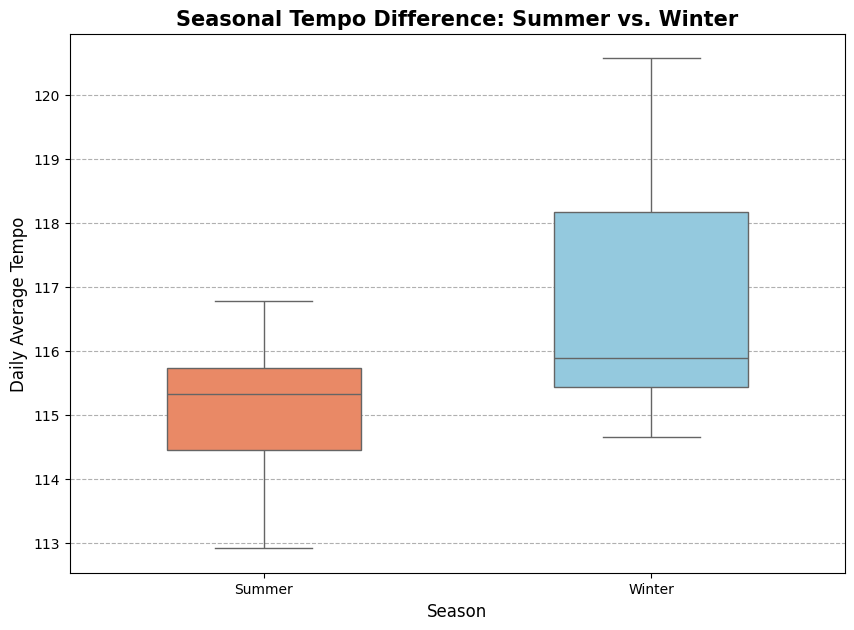

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
charts_df = pd.read_csv('../data/processed_data/spotify_2025_daily_charts.csv')
music_df = pd.read_csv('../data/processed_data/merged_music.csv')

# 2. 전처리 및 병합
charts_df['date'] = pd.to_datetime(charts_df['date'])
merged_df = pd.merge(charts_df, music_df, on=['track_name', 'artist_names'], how='inner')

# 3. 일별 가중 평균 템포 계산
def weighted_avg_tempo(group):
    return np.average(group['tempo'], weights=group['streams'])

daily_tempo = merged_df.groupby('date').apply(weighted_avg_tempo).reset_index(name='avg_tempo')

# 4. 계절 분류
daily_tempo['month'] = daily_tempo['date'].dt.month

summer_tempo = daily_tempo[daily_tempo['month'].isin([6, 7, 8])]['avg_tempo']
winter_tempo = daily_tempo[daily_tempo['month'].isin([12, 1, 2])]['avg_tempo']

# 5. 시각화 데이터 준비
plot_data = pd.DataFrame({
    'Season': ['Summer'] * len(summer_tempo) + ['Winter'] * len(winter_tempo),
    'Tempo': pd.concat([summer_tempo, winter_tempo])
})

# 6. 시각화
plt.figure(figsize=(10, 7))
sns.boxplot(x='Season', y='Tempo', data=plot_data, palette=['coral', 'skyblue'], width=0.5)
plt.title('Seasonal Tempo Difference: Summer vs. Winter', fontsize=15, fontweight='bold')
plt.ylabel('Daily Average Tempo', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

C:\Users\skybl\AppData\Local\Temp\ipykernel_24684\1901019340.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_tempo = merged_df.groupby('date').apply(weighted_avg_tempo).reset_index(name='avg_tempo')


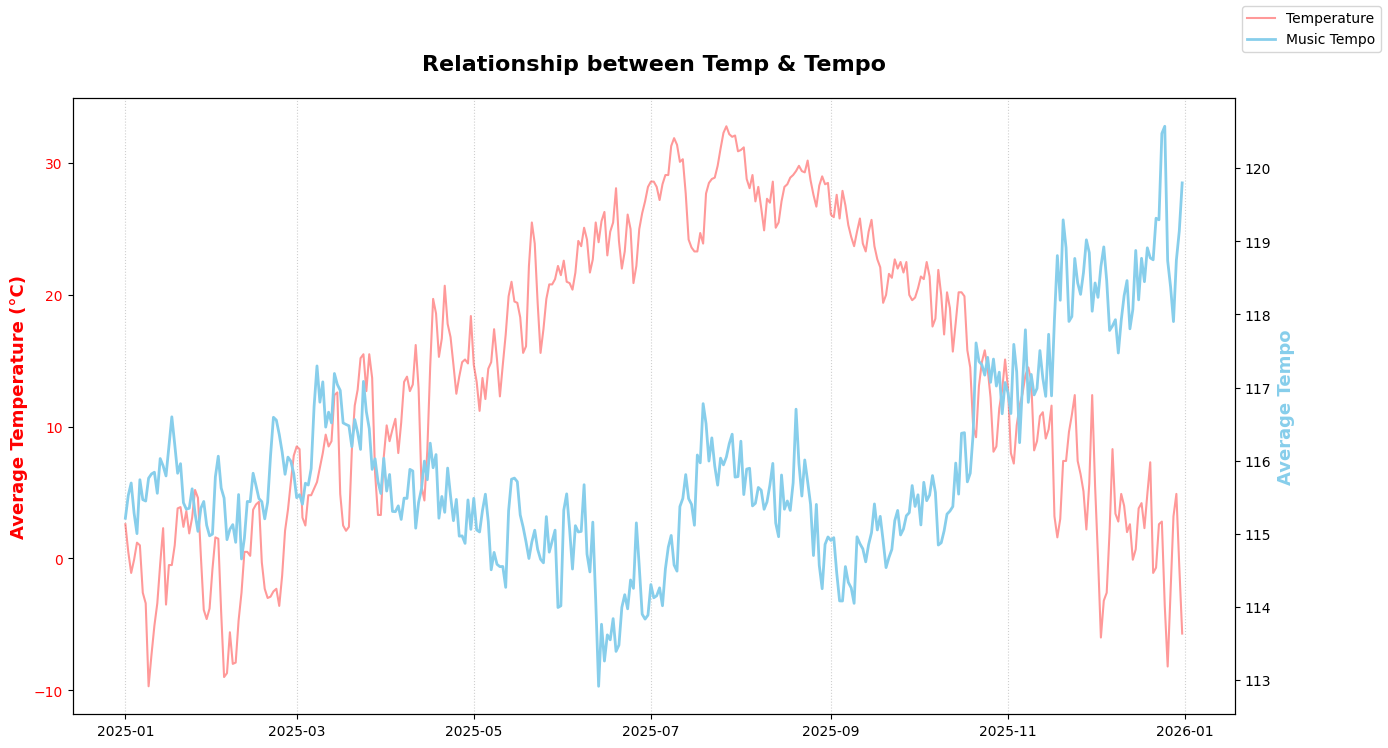

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드 (날짜 변환 포함)
charts_df = pd.read_csv('../data/processed_data/spotify_2025_daily_charts.csv', parse_dates=['date'])
weather_df = pd.read_csv('../data/processed_data/weather_charts_processed.csv', parse_dates=['date'])
music_df = pd.read_csv('../data/processed_data/merged_music.csv')

# 2. 병합 및 데이터 준비 (가중 평균 계산을 lambda로 한 줄 처리)
merged_df = pd.merge(charts_df, music_df, on=['track_name', 'artist_names'])

# 일별 가중 평균 템포 + 날씨 병합
def weighted_avg_tempo(group):
    return np.average(group['tempo'], weights=group['streams'])

daily_tempo = merged_df.groupby('date').apply(weighted_avg_tempo).reset_index(name='avg_tempo')
daily_tempo = pd.merge(daily_tempo, weather_df[['date', 'temp_avg']], on='date')

# 3. 시각화
fig, ax1 = plt.subplots(figsize=(15, 8))

# 왼쪽 축
ax1.set_ylabel('Average Temperature (°C)', color='red', fontsize=13, fontweight='bold')
ax1.plot(daily_tempo['date'], daily_tempo['temp_avg'], color='red', alpha=0.4, label='Temperature')
ax1.tick_params(axis='y', labelcolor='red')

# 오른쪽 축: 템포 (Blue)
ax2 = ax1.twinx()
ax2.set_ylabel('Average Tempo', color='skyblue', fontsize=13, fontweight='bold')
ax2.plot(daily_tempo['date'], daily_tempo['avg_tempo'], color='skyblue', linewidth=2, label='Music Tempo')

# 스타일링 및 출력
plt.title('Relationship between Temp & Tempo', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, axis='x', linestyle=':', alpha=0.6)
fig.legend()
plt.show()

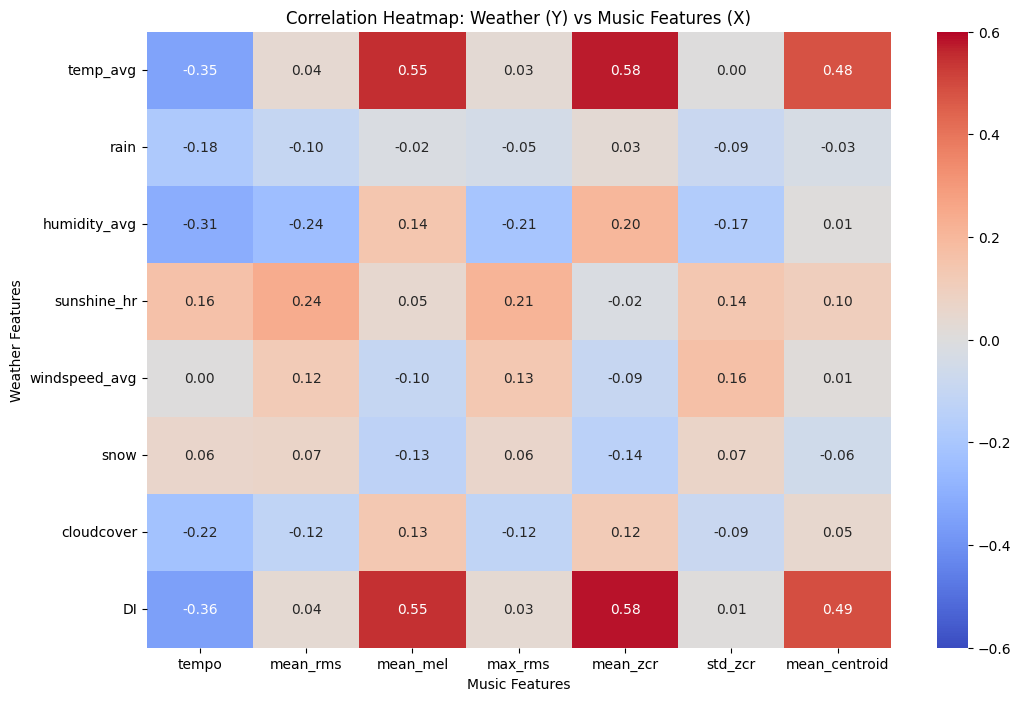

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

charts_df = pd.read_csv('../data/processed_data/spotify_2025_daily_charts.csv')
music_df = pd.read_csv('../data/processed_data/merged_music.csv')
weather_df = pd.read_csv('../data/processed_data/weather_charts_processed.csv')

music_df.rename(columns={'track_name': 'track_name', 'artist_names': 'artist_names'}, inplace=True)

merged_df = pd.merge(charts_df, music_df, on=['track_name', 'artist_names'], how='inner')

music_cols = [
    'tempo', 'mean_rms', 'mean_mel', 'max_rms', 
    'mean_zcr', 'std_zcr', 'mean_centroid'
]

daily_music = merged_df.groupby('date')[music_cols].mean().reset_index()
daily_music['date'] = pd.to_datetime(daily_music['date'])

weather_df['date'] = pd.to_datetime(weather_df['date'])
df_final = pd.merge(daily_music, weather_df, on='date', how='inner')

weather_cols = [
    'temp_avg', 'rain', 'humidity_avg', 'sunshine_hr', 
    'windspeed_avg', 'snow', 'cloudcover', 'DI'
]

corr_matrix = df_final[weather_cols + music_cols].corr()
heatmap_data = corr_matrix.loc[weather_cols, music_cols]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-0.6, vmax=0.6,)
plt.title('Correlation Heatmap: Weather (Y) vs Music Features (X)')
plt.ylabel('Weather Features')
plt.xlabel('Music Features')
plt.show()

In [65]:
music_df = pd.read_csv('../data/processed_data/merged_music.csv')

music_df[(music_df['tempo'] >= 140) & (music_df['genre'] == 'Holiday')]

,music_id,artist_names,track_name,genre,track_length_sec,release_country,tempo,mean_mel,mean_rms,max_rms,mean_zcr,std_zcr,mean_centroid
1043,1044,Kelly Clarkson,Underneath the Tree,Holiday,229.638,USA,161.50,-35.22,0.1733,0.2977,0.1426,0.04,2717.21
1066,1067,Justin Bieber,Mistletoe,Holiday,182.947,USA,161.50,-45.63,0.1498,0.4137,0.1259,0.11,2727.35
1068,1069,Brenda Lee,Rockin' Around The Christmas Tree,Holiday,126.267,USA,143.55,-41.21,0.0697,0.1807,0.1283,0.06,2335.98
1071,1072,Alessia Cara,Make It To Christmas,Holiday,210.983,USA,152.00,-44.81,0.1632,0.3782,0.0859,0.06,2440.19
1073,1074,Jonas Brothers,Like It's Christmas,Holiday,200.873,USA,143.55,-44.34,0.2033,0.5332,0.0963,0.06,2491.72
1084,1085,Nat King Cole,The Christmas Song (Merry Christmas To You),Holiday,192.151,USA,143.55,-53.14,0.1052,0.3232,0.0626,0.06,1471.99
1090,1091,Michael Bublé,Holly Jolly Christmas,Holiday,121.527,USA,152.00,-47.75,0.1982,0.4585,0.0652,0.05,1723.53
1096,1097,"Kelly Clarkson, Ariana Grande","Santa, Can’t You Hear Me",Holiday,242.645,USA,143.55,-34.43,0.0467,0.0754,0.1511,0.05,3113.29
1104,1105,José Feliciano,Feliz Navidad,Holiday,181.795,USA,152.00,-36.48,0.1229,0.2289,0.1247,0.04,2438.07
1109,1110,Sia,Santa's Coming for Us,Holiday,206.539,USA,184.57,-41.15,0.1023,0.2058,0.1251,0.07,2845.38
